# Task 8 - Next Word Prediction

***Dataset :*** https://thecleverprogrammer.com/2020/07/20/next-word-prediction-model/

***Problem Statement :***

<img src="Screenshot 2023-03-30 115041.png" width="500">

### Import all the libraries

In [1]:
import numpy as np
np.random.seed(42)

import tensorflow as tf
tf.random.set_seed(42)
 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop

import matplotlib.pyplot as plt

import pickle

import heapq

import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
path = '1661-0.txt'
text = open(path, encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


### Data Preprocessing

In [3]:
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [4]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []

for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
    
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [5]:
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

'e'

In [6]:
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [7]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [8]:
X.shape

(193950, 40, 73)

In [9]:
y.shape

(193950, 73)

### Create the model

In [10]:
model = Sequential()
model.add(LSTM(128, input_shape = (seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [12]:
optimizer = RMSprop(learning_rate = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

history = model.fit(X, y,
                    validation_split = 0.01, 
                    batch_size = 128,
                    epochs = 7, 
                    shuffle = True).history

Epoch 1/7
1501/1501 [==============================] - 180s 117ms/step - loss: 2.0556 - accuracy: 0.3987 - val_loss: 2.2221 - val_accuracy: 0.3722
Epoch 2/7
1501/1501 [==============================] - 178s 119ms/step - loss: 1.6808 - accuracy: 0.4963 - val_loss: 2.0741 - val_accuracy: 0.4309
Epoch 3/7
1501/1501 [==============================] - 172s 115ms/step - loss: 1.5575 - accuracy: 0.5303 - val_loss: 1.9772 - val_accuracy: 0.4474
Epoch 4/7
1501/1501 [==============================] - 181s 120ms/step - loss: 1.4927 - accuracy: 0.5488 - val_loss: 1.9402 - val_accuracy: 0.4603
Epoch 5/7
1501/1501 [==============================] - 183s 122ms/step - loss: 1.4499 - accuracy: 0.5594 - val_loss: 1.9199 - val_accuracy: 0.4696
Epoch 6/7
1501/1501 [==============================] - 181s 121ms/step - loss: 1.4179 - accuracy: 0.5677 - val_loss: 1.9322 - val_accuracy: 0.4747
Epoch 7/7
1501/1501 [==============================] - 182s 121ms/step - loss: 1.3954 - accuracy: 0.5732 - val_loss: 1

### Save the Model

In [13]:
model.save('Next_Word_Prediction.h5')
pickle.dump(history, open("history.p", "wb"))

### Loading our model

In [14]:
model = load_model('Next_Word_Prediction.h5')
history = pickle.load(open("history.p", "rb"))

### Model Evaluation

In [15]:
loss_and_acc = model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 142s 23ms/step - loss: 1.3539 - accuracy: 0.5835
Test Loss 1.3538860082626343
Test Accuracy 0.5835266709327698


### Plotting training and validation plots

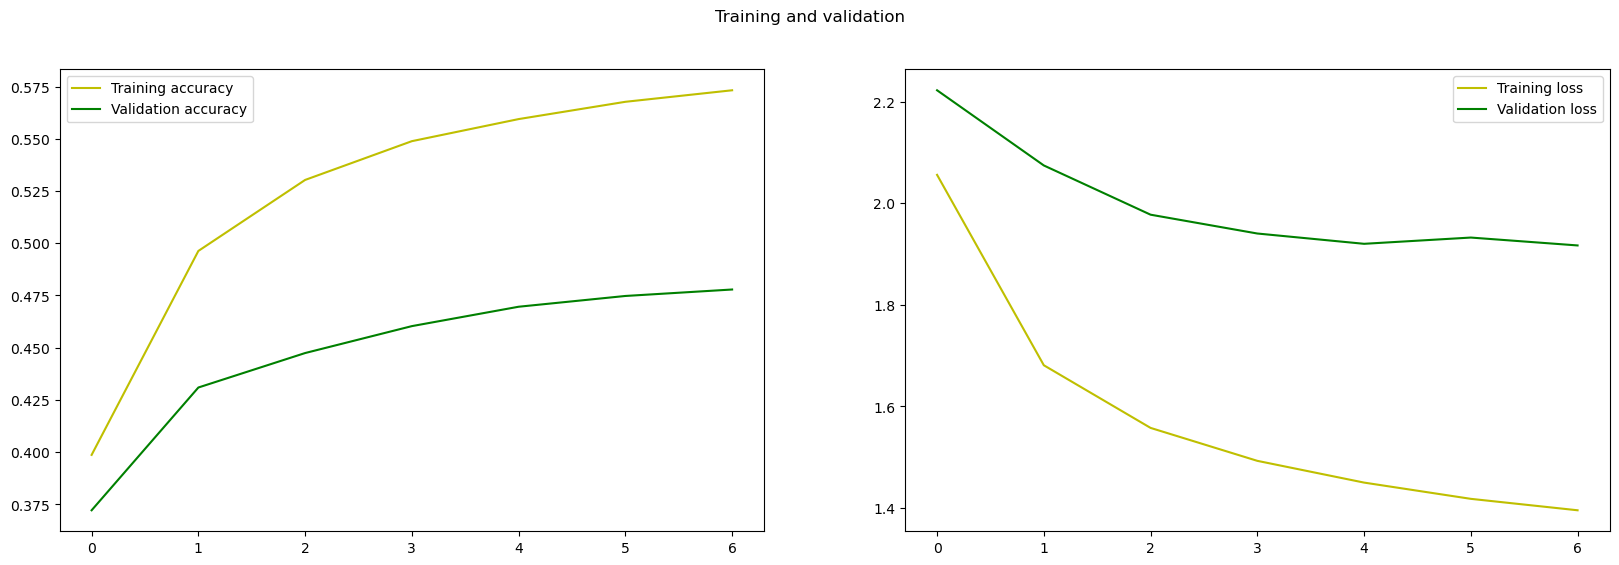

In [16]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
ax[0].plot(epochs, acc, 'y', label = 'Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label = 'Validation accuracy')
ax[0].legend(loc = 0)
ax[1].plot(epochs, loss, 'y', label = 'Training loss')
ax[1].plot(epochs, val_loss, 'g', label = 'Validation loss')
ax[1].legend(loc = 0)

plt.suptitle('Training and validation')
plt.show()

In [17]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### Functions to get next probable characters

In [18]:
def sample(preds, top_n = 3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [19]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose = 0)[0]
        next_index = sample(preds, top_n = 1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [20]:
def predict_completions(text, n = 3):
    x = prepare_input(text)
    preds = model.predict(x, verbose = 0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) 
            for idx in next_indices]

### Output

In [21]:
quotes = [   
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "Machine learning  is the study of computer algorithms that improve automatically through experience and by the use of data.",
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.",
    "Thanks for spending your precious time to view my work."  
    
]

In [22]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

deep learning is subset of machine learn
['ed ', ' at ', 'ing ', '. ', ', ']

machine learning  is the study of comput
['ches ', 'ted ', ' of ', 'ion ', 'hed ']

it is not a lack of love, but a lack of 
['the ', 'a ', 'her ', 'miss ', 'some ']

recurrent neural network (rnn) is a type
['write ', 'ther ', 'stand ', 'rster ', ' of ']

thanks for spending your precious time t
['o ', 'hat ', 'ell ', 'ay ', 'wo ']

